Dieses Notebook erlaubt es, die verblindeten Testdaten mit allen Trainigsdaten zu korrelieren. Feature Selection kann hier auch betrieben werden. Viel Erfolg!

###  Wir machen uns eine Liste mit allen unseren Hirnbildern

In [1]:
import os

In [2]:
imgList = ['../training/%s'%x for x in os.listdir('../training/')] + \
['../test/%s'%x for x in os.listdir('../test/')]

imgList = [x for x in imgList if x.split('/')[-1].startswith('s08')]

imgList.sort()

In [3]:
imgList

['../test/s08SECRETstart.nii.gz',
 '../test/s08SECRETstop.nii.gz',
 '../test/s08num000.nii.gz',
 '../test/s08num001.nii.gz',
 '../test/s08num002.nii.gz',
 '../test/s08num003.nii.gz',
 '../test/s08num004.nii.gz',
 '../test/s08num005.nii.gz',
 '../test/s08num006.nii.gz',
 '../test/s08num007.nii.gz',
 '../test/s08num008.nii.gz',
 '../test/s08num009.nii.gz',
 '../test/s08num010.nii.gz',
 '../test/s08num011.nii.gz',
 '../test/s08num012.nii.gz',
 '../test/s08num013.nii.gz',
 '../test/s08num014.nii.gz',
 '../test/s08num015.nii.gz',
 '../test/s08num016.nii.gz',
 '../test/s08num017.nii.gz',
 '../test/s08num018.nii.gz',
 '../test/s08num019.nii.gz',
 '../test/s08num020.nii.gz',
 '../test/s08num021.nii.gz',
 '../test/s08num022.nii.gz',
 '../test/s08num023.nii.gz',
 '../test/s08num024.nii.gz',
 '../test/s08num025.nii.gz',
 '../test/s08num026.nii.gz',
 '../test/s08num027.nii.gz',
 '../test/s08num028.nii.gz',
 '../test/s08num029.nii.gz',
 '../test/s08num030.nii.gz',
 '../test/s08num031.nii.gz',
 '../

### Wir extrahieren wieder die Daten aus den Bildern

In [4]:
from nilearn import image, datasets, input_data, plotting

In [5]:
masker = input_data.NiftiMasker(mask_img='../masks/MNI152_T1_2mm_brain_mask.nii.gz').fit()

In [6]:
masker

NiftiMasker(detrend=False, high_pass=None, low_pass=None, mask_args=None,
      mask_img='../masks/MNI152_T1_2mm_brain_mask.nii.gz',
      mask_strategy='background', memory=Memory(cachedir=None),
      memory_level=1, sample_mask=None, sessions=None, smoothing_fwhm=None,
      standardize=False, t_r=None, target_affine=None, target_shape=None,
      verbose=0)

In [7]:
%matplotlib inline
import matplotlib.pylab as plt

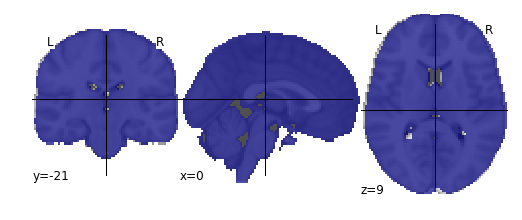

In [8]:
plotting.plot_roi(masker.mask_img_);

### Wir packen alle Daten in eine Tabelle

In [9]:
import pandas as pd

In [10]:
def makeBigDf(imgList,masker):
    bigDf = pd.DataFrame()
    for img in imgList:
        
        # name für test
        if 'num' in img or 'SECRET' in img:
            cond = '***test'
            cont = img.split('/')[-1].split('.')[0]
        
        # name für training
        else:
            thisName = img.split('/')[-1].split('.')[0]
            cond,num,content = thisName.split('_')
            cont = '%s_%s' % (num,content)
            
        thisDf = pd.DataFrame(masker.transform(img))
        thisDf.index = [[cond[3:]],[cont]]
        bigDf = pd.concat([bigDf,thisDf])
    bigDf.sort_index(inplace=True)
    return bigDf

In [11]:
blockDf = makeBigDf(imgList,masker)

In [12]:
blockDf

0         1         2       \
EMOTION   004_Negativ-Sturm                0.298437  0.280766  0.226124   
          007_Positiv-Wald                 0.050972  0.166825  0.246762   
          013_Negativ-Klippe               0.110247  0.213807  0.299219   
          016_Positiv-Strand              -0.246740 -0.144198 -0.021383   
          024_Negativ-Waldbrand           -0.478858 -0.454537 -0.469940   
          029_Positiv-See                 -0.233535 -0.269339 -0.262766   
          033_Negativ-Strand               0.435625  0.373756  0.335652   
          036_Positiv-Berg                -0.606882 -0.664675 -0.706450   
GESICHTER 003_Bekannt-Freunde              0.527384  0.333976  0.154485   
          008_Beruehmt-Filmschauspieler   -0.035392 -0.181237 -0.345604   
          011_Bekannt-Familie             -0.245975 -0.265224 -0.228848   
          017_Beruehmt-Musiker             0.174054  0.072537 -0.044816   
          022_Bekannt-Kommilitonen         0.649833  0.590912  0.508608   
          026_Beruehmt-Serienschauspieler -0.157659 -0.165157 -0.122029   
          032_Bekannt-Schulfreunde         0.497532  0.417292  0.332710   
          038_Beruehmt-Sportler           -0.090964 -0.072964 -0.034429   
MOTORIK   002_Haende-Jonglieren           -0.660450 -0.621550 -0.549074   
          006_Fuesse-Balltreten           -0.532900 -0.385512 -0.217303   
          012_Haende-Kanu                  0.085867  0.151571  0.272488   
          018_Fuesse-Fahrrad               0.023669  0.060825  0.059634   
          021_Haende-Boxen                -0.991997 -0.923105 -0.806034   
          028_Fuesse-Hochseil             -0.093036 -0.036726  0.059131   
          034_Haende-Ballwerfen            0.179763  0.189151  0.198696   
          039_Fuesse-Trampolin            -0.538071 -0.568671 -0.603332   
RUHE      005_Ruhe                         0.069575  0.037061  0.008005   
          010_Ruhe                        -0.585204 -0.565841 -0.550450   
          015_Ruhe                         0.323075  0.187385  0.084478   
          020_Ruhe                        -0.383987 -0.471538 -0.561678   
          025_Ruhe                         0.114412  0.085152  0.034121   
          030_Ruhe                         0.738058  0.665159  0.511289   
...                                             ...       ...       ...   
test      s08num010                       -0.079726  0.000148  0.182999   
          s08num011                        0.178818  0.159610  0.114381   
          s08num012                        0.015703  0.051336  0.075801   
          s08num013                        0.291374  0.246321  0.110707   
          s08num014                       -0.037868 -0.042821 -0.113161   
          s08num015                        0.093869  0.103289  0.163146   
          s08num016                       -0.510137 -0.501783 -0.550823   
          s08num017                        0.649384  0.564951  0.400150   
          s08num018                        0.064449  0.213596  0.344093   
          s08num019                       -0.226753 -0.191432 -0.230724   
          s08num020                        0.098933  0.026720  0.027979   
          s08num021                       -0.499229 -0.288235 -0.030557   
          s08num022                       -0.014766  0.024334  0.167576   
          s08num023                        0.736091  0.843664  0.982948   
          s08num024                        0.201701  0.193250  0.108768   
          s08num025                        0.129554  0.104405  0.054886   
          s08num026                        0.041200  0.105455  0.164746   
          s08num027                        0.431650  0.356744  0.227765   
          s08num028                        0.073204  0.065783  0.088320   
          s08num029                       -0.035755 -0.007047  0.124723   
          s08num030                       -0.317617 -0.301106 -0.272040   
          s08num031                        0.446522  0.449252  0.47414

## Train-Test Split

In [13]:
blockDf.drop('test')

0         1         2       \
EMOTION   004_Negativ-Sturm                0.298437  0.280766  0.226124   
          007_Positiv-Wald                 0.050972  0.166825  0.246762   
          013_Negativ-Klippe               0.110247  0.213807  0.299219   
          016_Positiv-Strand              -0.246740 -0.144198 -0.021383   
          024_Negativ-Waldbrand           -0.478858 -0.454537 -0.469940   
          029_Positiv-See                 -0.233535 -0.269339 -0.262766   
          033_Negativ-Strand               0.435625  0.373756  0.335652   
          036_Positiv-Berg                -0.606882 -0.664675 -0.706450   
GESICHTER 003_Bekannt-Freunde              0.527384  0.333976  0.154485   
          008_Beruehmt-Filmschauspieler   -0.035392 -0.181237 -0.345604   
          011_Bekannt-Familie             -0.245975 -0.265224 -0.228848   
          017_Beruehmt-Musiker             0.174054  0.072537 -0.044816   
          022_Bekannt-Kommilitonen         0.649833  0.590912  0.508608   
          026_Beruehmt-Serienschauspieler -0.157659 -0.165157 -0.122029   
          032_Bekannt-Schulfreunde         0.497532  0.417292  0.332710   
          038_Beruehmt-Sportler           -0.090964 -0.072964 -0.034429   
MOTORIK   002_Haende-Jonglieren           -0.660450 -0.621550 -0.549074   
          006_Fuesse-Balltreten           -0.532900 -0.385512 -0.217303   
          012_Haende-Kanu                  0.085867  0.151571  0.272488   
          018_Fuesse-Fahrrad               0.023669  0.060825  0.059634   
          021_Haende-Boxen                -0.991997 -0.923105 -0.806034   
          028_Fuesse-Hochseil             -0.093036 -0.036726  0.059131   
          034_Haende-Ballwerfen            0.179763  0.189151  0.198696   
          039_Fuesse-Trampolin            -0.538071 -0.568671 -0.603332   
RUHE      005_Ruhe                         0.069575  0.037061  0.008005   
          010_Ruhe                        -0.585204 -0.565841 -0.550450   
          015_Ruhe                         0.323075  0.187385  0.084478   
          020_Ruhe                        -0.383987 -0.471538 -0.561678   
          025_Ruhe                         0.114412  0.085152  0.034121   
          030_Ruhe                         0.738058  0.665159  0.511289   
          035_Ruhe                         0.504715  0.602311  0.692033   
          040_Ruhe                        -0.271100 -0.235799 -0.260020   
SPRACHE   001_Sprechen-Tiere              -0.062860 -0.123455 -0.174932   
          009_Schreiben-Lebensmittel       0.481040  0.696451  0.866260   
          014_Sprechen-Staedte             0.377749  0.280495  0.126578   
          019_Schreiben-Vornamen           0.295741  0.319224  0.356477   
          023_Sprechen-Lebensmittel        0.343107  0.386100  0.416588   
          027_Schreiben-Tiere             -0.010171 -0.005099 -0.053600   
          031_Sprechen-Vornamen           -0.231322 -0.213443 -0.191721   
          037_Schreiben-Staedte            0.511774  0.592085  0.735193   

                                             3         4         5       \
EMOTION   004_Negativ-Sturm                0.300763  0.249581  0.364199   
          007_Positiv-Wald                 0.006890  0.110656 -0.215160   
          013_Negativ-Klippe               0.130578  0.247793 -0.026233   
          016_Positiv-Strand              -0.227940 -0.132042 -0.254361   
          024_Negativ-Waldbrand           -0.593110 -0.522689 -0.741202   
          029_Positiv-See                 -0.297636 -0.331669 -0.324384   
          033_Negativ-Strand               0.409288  0.339520  0.407197   
          036_Positiv-Berg                -0.668864 -0.695710 -0.666422   
GESICHTER 003_Bekannt-Freunde              0.554090  0.389571  0.773092   
          008_Beruehmt-Filmschauspieler   -0.120628 -0.247874 -0.174254   
          011_Bekannt-Familie             -0.165657 -0.164262 -0.091647   
          017_Beruehmt-Musiker             0.293535  0.180042  0.4508

In [14]:
# funktion, um unsere Tabelle aufzuteilen
def makeTrainTest(bigDf):
    
    # training = alles außer test
    train = bigDf.drop('test')
    # test = test
    test = bigDf.ix['test']
    
    return train,test

In [15]:
train,test = makeTrainTest(blockDf)

In [16]:
train

0         1         2       \
EMOTION   004_Negativ-Sturm                0.298437  0.280766  0.226124   
          007_Positiv-Wald                 0.050972  0.166825  0.246762   
          013_Negativ-Klippe               0.110247  0.213807  0.299219   
          016_Positiv-Strand              -0.246740 -0.144198 -0.021383   
          024_Negativ-Waldbrand           -0.478858 -0.454537 -0.469940   
          029_Positiv-See                 -0.233535 -0.269339 -0.262766   
          033_Negativ-Strand               0.435625  0.373756  0.335652   
          036_Positiv-Berg                -0.606882 -0.664675 -0.706450   
GESICHTER 003_Bekannt-Freunde              0.527384  0.333976  0.154485   
          008_Beruehmt-Filmschauspieler   -0.035392 -0.181237 -0.345604   
          011_Bekannt-Familie             -0.245975 -0.265224 -0.228848   
          017_Beruehmt-Musiker             0.174054  0.072537 -0.044816   
          022_Bekannt-Kommilitonen         0.649833  0.590912  0.508608   
          026_Beruehmt-Serienschauspieler -0.157659 -0.165157 -0.122029   
          032_Bekannt-Schulfreunde         0.497532  0.417292  0.332710   
          038_Beruehmt-Sportler           -0.090964 -0.072964 -0.034429   
MOTORIK   002_Haende-Jonglieren           -0.660450 -0.621550 -0.549074   
          006_Fuesse-Balltreten           -0.532900 -0.385512 -0.217303   
          012_Haende-Kanu                  0.085867  0.151571  0.272488   
          018_Fuesse-Fahrrad               0.023669  0.060825  0.059634   
          021_Haende-Boxen                -0.991997 -0.923105 -0.806034   
          028_Fuesse-Hochseil             -0.093036 -0.036726  0.059131   
          034_Haende-Ballwerfen            0.179763  0.189151  0.198696   
          039_Fuesse-Trampolin            -0.538071 -0.568671 -0.603332   
RUHE      005_Ruhe                         0.069575  0.037061  0.008005   
          010_Ruhe                        -0.585204 -0.565841 -0.550450   
          015_Ruhe                         0.323075  0.187385  0.084478   
          020_Ruhe                        -0.383987 -0.471538 -0.561678   
          025_Ruhe                         0.114412  0.085152  0.034121   
          030_Ruhe                         0.738058  0.665159  0.511289   
          035_Ruhe                         0.504715  0.602311  0.692033   
          040_Ruhe                        -0.271100 -0.235799 -0.260020   
SPRACHE   001_Sprechen-Tiere              -0.062860 -0.123455 -0.174932   
          009_Schreiben-Lebensmittel       0.481040  0.696451  0.866260   
          014_Sprechen-Staedte             0.377749  0.280495  0.126578   
          019_Schreiben-Vornamen           0.295741  0.319224  0.356477   
          023_Sprechen-Lebensmittel        0.343107  0.386100  0.416588   
          027_Schreiben-Tiere             -0.010171 -0.005099 -0.053600   
          031_Sprechen-Vornamen           -0.231322 -0.213443 -0.191721   
          037_Schreiben-Staedte            0.511774  0.592085  0.735193   

                                             3         4         5       \
EMOTION   004_Negativ-Sturm                0.300763  0.249581  0.364199   
          007_Positiv-Wald                 0.006890  0.110656 -0.215160   
          013_Negativ-Klippe               0.130578  0.247793 -0.026233   
          016_Positiv-Strand              -0.227940 -0.132042 -0.254361   
          024_Negativ-Waldbrand           -0.593110 -0.522689 -0.741202   
          029_Positiv-See                 -0.297636 -0.331669 -0.324384   
          033_Negativ-Strand               0.409288  0.339520  0.407197   
          036_Positiv-Berg                -0.668864 -0.695710 -0.666422   
GESICHTER 003_Bekannt-Freunde              0.554090  0.389571  0.773092   
          008_Beruehmt-Filmschauspieler   -0.120628 -0.247874 -0.174254   
          011_Bekannt-Familie             -0.165657 -0.164262 -0.091647   
          017_Beruehmt-Musiker             0.293535  0.180042  0.4508

In [17]:
test

,0,1,2,3,4,5,6,7,8,9,...,228473,228474,228475,228476,228477,228478,228479,228480,228481,228482
s08SECRETstart,-0.021824,-0.007229,0.006863,-0.020623,0.002496,-0.050344,-0.012090,0.020008,0.010936,0.052961,...,0.135257,0.133319,-0.007676,-0.017930,-0.025929,-0.030300,0.003908,-0.016677,-0.029740,-0.045136
s08SECRETstop,0.051697,0.064665,0.072764,0.051981,0.065681,0.038474,0.041827,0.049952,0.025133,-0.074517,...,0.019361,0.004341,0.006535,0.031490,0.065559,0.091741,-0.035085,-0.012732,0.025043,-0.037265
s08num000,-0.145742,-0.054366,0.129464,-0.115745,-0.052902,-0.141529,-0.108488,-0.056286,-0.134804,-0.039760,...,-0.192822,-0.081057,-0.101020,-0.100801,-0.118671,-0.152697,-0.090081,-0.129213,-0.208642,-0.036664
s08num001,0.360666,0.252789,-0.078821,0.342987,0.275272,0.309522,0.318139,0.274187,0.340536,-0.054299,...,0.474223,0.390189,0.089756,0.167529,0.297830,0.429032,-0.063191,0.022156,0.202983,-0.007336
s08num002,-0.115014,-0.104252,-0.173922,-0.125682,-0.090417,-0.131482,-0.054817,-0.021681,0.061668,0.088210,...,0.277012,0.275995,0.088715,0.186930,0.282992,0.326773,0.020995,0.136441,0.262595,0.003304
s08num003,-0.076835,-0.134137,-0.153014,-0.084556,-0.161811,-0.031100,-0.166319,-0.249596,-0.277766,-0.241575,...,-0.851695,-0.880301,-0.287015,-0.311450,-0.382756,-0.466857,-0.650831,-0.677804,-0.704483,-0.971477
s08num004,-0.057727,-0.083514,-0.161655,-0.098842,-0.093596,-0.152810,-0.085729,-0.043675,-0.034794,0.039226,...,0.148228,0.293085,-0.148717,-0.220493,-0.233058,-0.196024,0.073163,0.001816,-0.035533,0.289984
s08num005,-0.060409,-0.298060,-0.642675,-0.061448,-0.257211,0.030008,-0.066873,-0.202866,-0.088145,0.483063,...,-0.039173,0.080294,0.049263,0.126260,0.075316,-0.037552,-0.007234,0.046594,-0.026895,-0.081730
s08num006,0.279929,0.345748,0.446222,0.282555,0.326677,0.251879,0.263010,0.275290,0.235126,0.368569,...,0.286710,0.345199,0.221530,0.235470,0.105497,-0.068363,0.309129,0.283672,0.086922,0.358184
s08num007,-0.529316,-0.706469,-0.979297,-0.531344,-0.682915,-0.452874,-0.565711,-0.683615,-0.603442,-0.691857,...,-0.866113,-0.932701,-0.359489,-0.377919,-0.399114,-0.421283,-0.633759,-0.580767,-0.495985,-0.807618


In [18]:
trainMeanDf = train.groupby(level=0).mean()

In [19]:
trainMeanDf

,0,1,2,3,4,5,6,7,8,9,...,228473,228474,228475,228476,228477,228478,228479,228480,228481,228482
EMOTION,-0.083842,-0.062199,-0.044098,-0.117504,-0.091820,-0.182046,-0.155793,-0.128164,-0.177921,-0.285265,...,-0.296846,-0.273916,0.005393,0.006040,-0.014577,-0.036179,-0.049874,-0.055162,-0.083124,-0.091991
GESICHTER,0.164852,0.091267,0.027510,0.187357,0.115185,0.259627,0.181434,0.117873,0.133226,0.049486,...,-0.085039,-0.177642,0.009118,-0.007545,0.006347,0.042380,-0.035250,-0.058987,-0.049230,-0.106148
MOTORIK,-0.315894,-0.266752,-0.198224,-0.307015,-0.269044,-0.300096,-0.278557,-0.254481,-0.233993,-0.128765,...,0.114591,0.187289,-0.123460,-0.199184,-0.270121,-0.315490,-0.100667,-0.164126,-0.236302,-0.078001
RUHE,0.063693,0.037986,-0.005278,0.038397,0.032061,-0.001692,0.028414,0.045623,0.012645,0.319307,...,0.059163,0.117034,-0.123078,-0.109827,-0.093289,-0.089086,-0.117184,-0.114330,-0.106809,-0.130306
SPRACHE,0.213132,0.241545,0.260105,0.243910,0.256702,0.272072,0.268158,0.257865,0.309031,0.064018,...,0.197580,0.151502,0.200699,0.301715,0.383684,0.422817,0.259056,0.359111,0.455857,0.375155


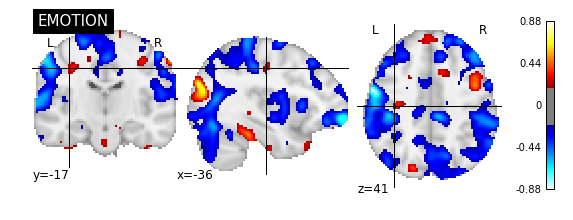

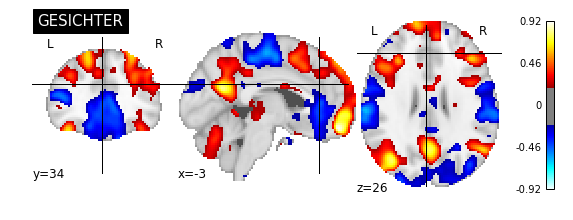

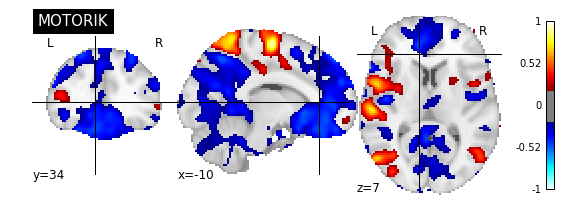

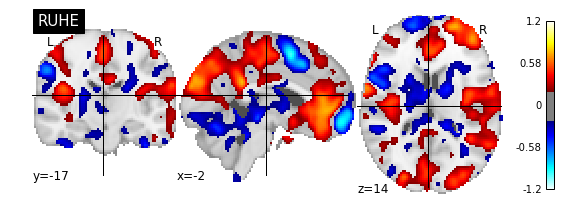

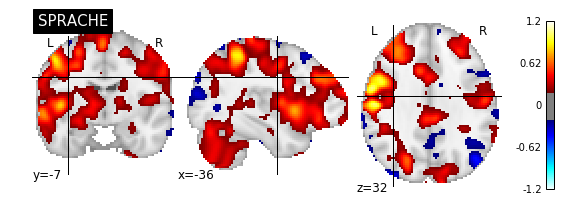

In [20]:
for cond in trainMeanDf.index:
    thisImg = masker.inverse_transform(trainMeanDf.ix[cond])
    plotting.plot_stat_map(thisImg,title=cond,threshold=0.2)
    plt.show()

## Korrelation

In [21]:
import numpy as np

### erst zirkulär - als sanity check

In [22]:
myCorrDf = pd.DataFrame(np.corrcoef(trainMeanDf,train)[5:,:5],
                        index=train.index,
                        columns=trainMeanDf.index)

In [23]:
import seaborn as sns

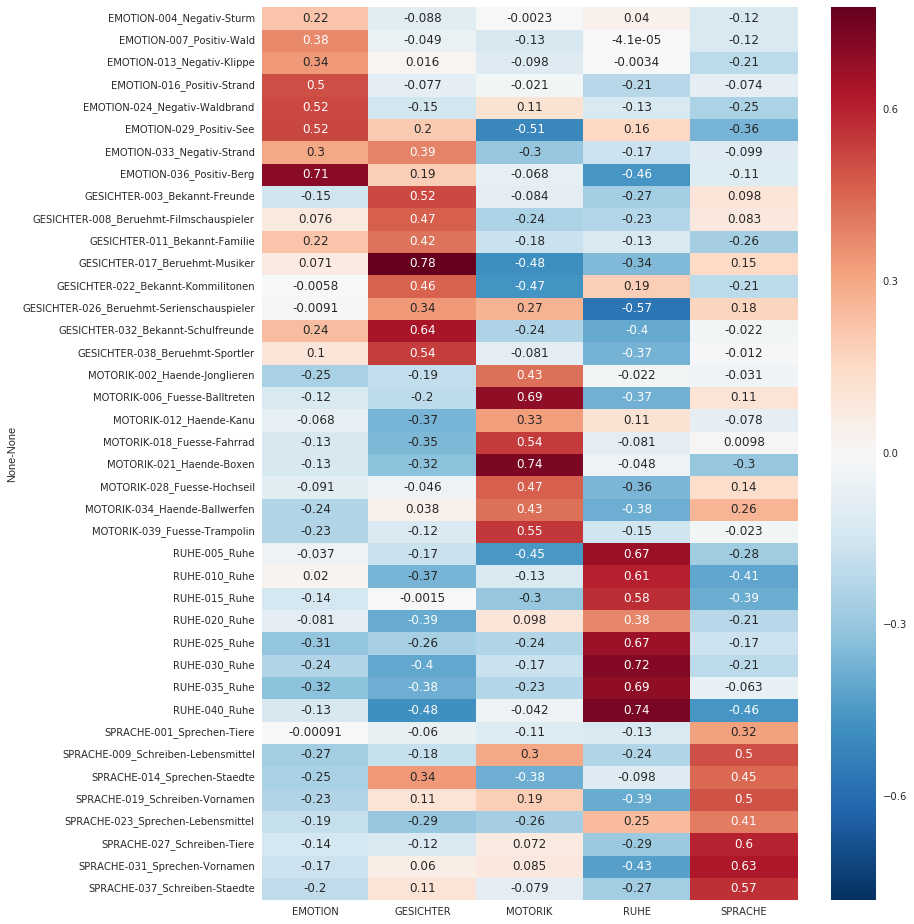

In [24]:
plt.figure(figsize=(12,16))
sns.heatmap(myCorrDf,annot=True)
plt.show()

### jetzt die Vorhersage

In [25]:
myCorrDf = pd.DataFrame(np.corrcoef(trainMeanDf,test)[5:,:5],
                        index=test.index,
                        columns=trainMeanDf.index)

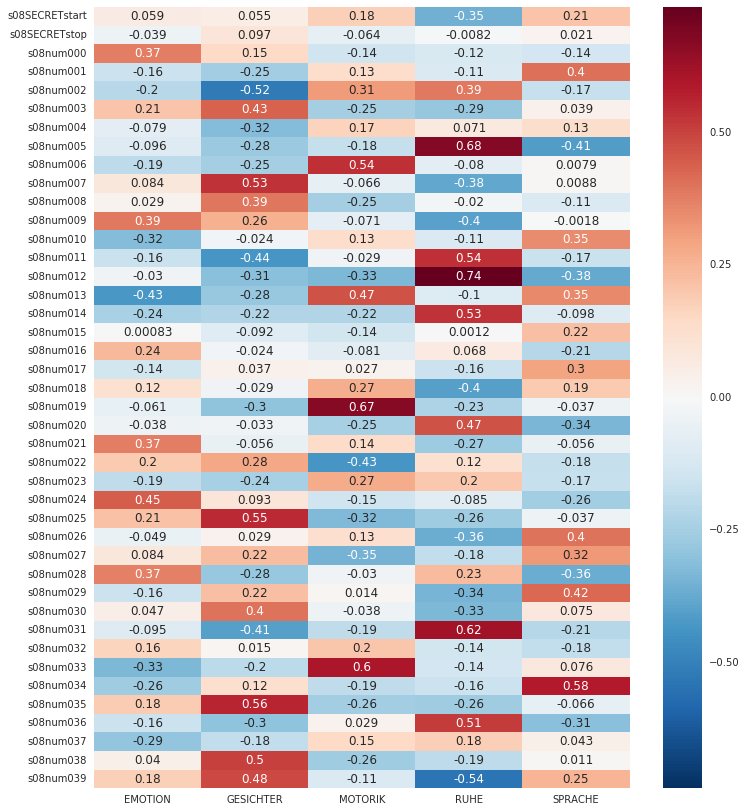

In [26]:
plt.figure(figsize=(12,14))
sns.heatmap(myCorrDf,annot=True)
plt.show()

### Entscheidungsregel (winner takes all)

In [27]:
def makeCorrPred(myCorrDf):
    d = {}
    # wir gehen durch jede Zeile
    for cond in myCorrDf.index:
        # wir wählen diese Zeile aus
        thisDf = myCorrDf.ix[cond]
        # wir wählen die Spalte mit dem höhsten Wert aus
        winner = thisDf.idxmax()
        # wir schreiben einen eintrag nur mit der vorhersage (winner)
        # real : wissen wir nicht...
        # winner: die spalte mit der höchsten korrelation
        # hit: wissen wir nicht...
        d[cond] = {'winner':winner }
        
    # wir packen das ganze in eine tabelle, die wir nett formatieregn
    predDf = pd.DataFrame(d).T

    return predDf

In [28]:
corrPredDf = makeCorrPred(myCorrDf)

In [29]:
corrPredDf

,winner
s08SECRETstart,SPRACHE
s08SECRETstop,GESICHTER
s08num000,EMOTION
s08num001,SPRACHE
s08num002,RUHE
s08num003,GESICHTER
s08num004,MOTORIK
s08num005,RUHE
s08num006,MOTORIK
s08num007,GESICHTER


## Maskieren von Daten

Jetzt wollen wir keine whole-brain Maske mehr verwenden, weil wir nicht glauben, dass jeder Voxel gleich wichtig ist. Wir wissen auf jeden Fall, das Voxel außerhalb des Gehirns keine sinnvolle Information tragen können, daher haben wir sie bisher ausgeschlossen. Jetzt sagen wir, dass Voxel in bestimmten Arealen (z.B. Broca, SMA) wichtiger sein sollten als Voxel in z.B. primär visuellen Arealen (da unsere Vp ja nichts anschaut). Wir verwenden für diese Gewichtung wieder eine Maske mit Nullen und Einsen, was (wie alles was wir tun) ziemlich primitiv ist. Besser wäre eine kontinuierliche Gewichtung, bei der es Abstufungen gibt, aber wir schauen einfach, wie weit wir mit unserem primitivem Vorgehen kommen.  

Als erstes **erstellen** wir die Masken. Danach werden wir die Masken **anwenden**.  Wir könnten Masken aus jeglicher Quelle nehmen, z.B. aus einem Atlas, aus Neurosynth etc.  
Heute nehmen wir die Masken aus den gemittelten Aktivierungen die wir eh benutzen um Vorhersagen zu treffen. Das scheint sinnlos und zirkulär, weil wir ja keine neuen Informationen verwenden, sondern nur Daten wegschmeißen und das Kriterium dafür die Daten selbst sind. Es ist aber wichtig zu verstehen, dass wir innerhalb unserer Trainingsdaten auch Dinge tun dürfen die zirkulär und falsch sein mögen. Wir haben trotzdem die Vorhersage der Testdaten als unabhängiges und objektives Kriterium dafür, ob das was bringt. Schauen wir also einmal, was passiert. 

In [30]:
def makeMasks(meanDf,pc):
    roiDict = {}
    # wir machen uns eine Kopie unserer gemittelten Aktivierngstabelle,
    # damit wir sie beabeiten können
    copyDf = meanDf.copy()
    # für jede Bedingung
    for cond in copyDf.index:
        # wir wählen die Bedingung aus
        thisCond = copyDf.ix[cond]
        # wir schauen, welcher Wert einem vordefinierten Percentil entspricht
        # merke: Percentil 84 würde z.B. bedeuten, dass der Wert höher ist als
        # von 84% der restlichen Voxel
        thisPercentile = np.percentile(thisCond,pc)

        # alles was über dem percentil liegt wird zu einer hohen zahl
        thisCond[thisCond>=thisPercentile]=999999
        # alles was unter der zahl liegt wird zu null
        thisCond[thisCond<999999] = 0
        # alles was nicht zu null wurde wird zu eins
        thisCond[thisCond>0] = 1
        
        # wir haben eine binäre Make (0 und 1 ) und fügen sie unserer Liste
        # mit Masken (eine pro Bedingung) hinzu
        roiDict[cond] = thisCond
    
    # wenn wir fertig sind, machen wird daraus eine Tabelle
    roiDf = pd.DataFrame(roiDict).T
    # Ausgabe der Tabelle
    return roiDf

Beispiel: alles was unter Percentil 90 fällt, wird zu Null; alles darüber wird zu Eins

In [31]:
roiDf = makeMasks(trainMeanDf,90)

Wir sehen viele Nullen:

In [32]:
roiDf

,0,1,2,3,4,5,6,7,8,9,...,228473,228474,228475,228476,228477,228478,228479,228480,228481,228482
EMOTION,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GESICHTER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MOTORIK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RUHE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SPRACHE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Visualisierung der Karten und der aus ihnen erstellen Masken

In [33]:
def plotRois(roiDf,meanDf):
    for cond in roiDf.index:
        fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

        thisOrigImg = masker.inverse_transform(meanDf.ix[cond])
        thisMaskImg = masker.inverse_transform(roiDf.ix[cond])

        display = plotting.plot_stat_map(thisOrigImg,threshold=0.0,axes=ax1,title=cond)
        plotting.plot_roi(thisMaskImg,title=cond,cut_coords=display.cut_coords,axes=ax2)

        plt.show()

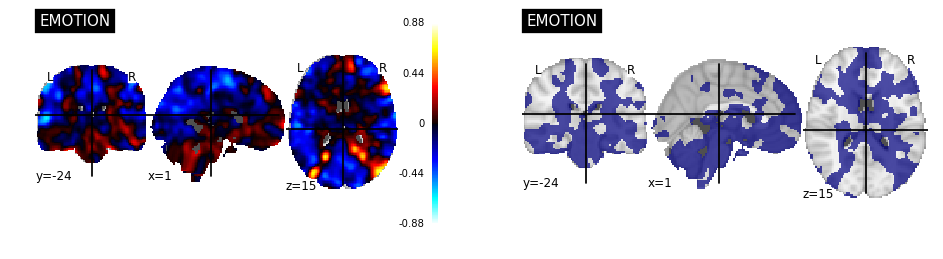

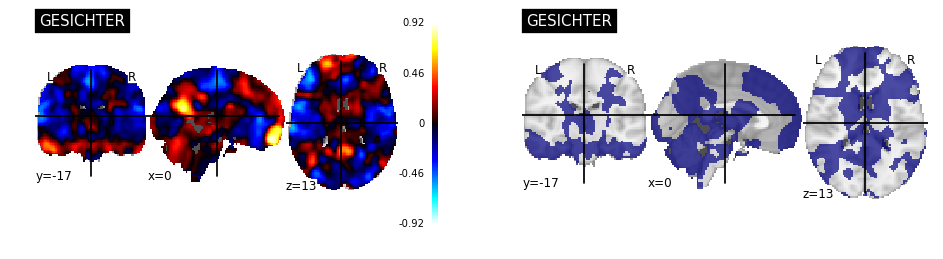

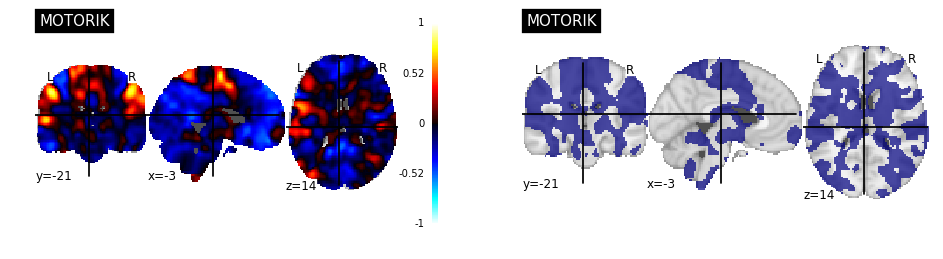

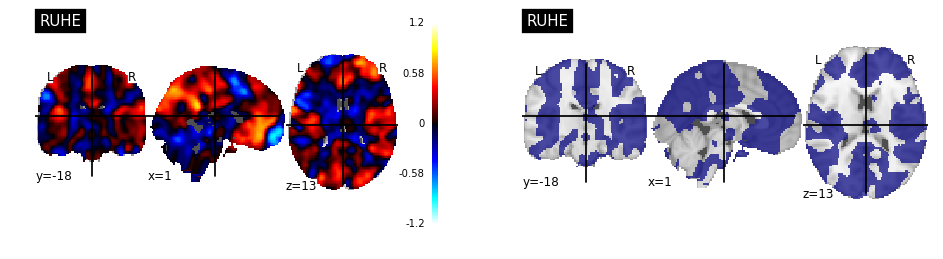

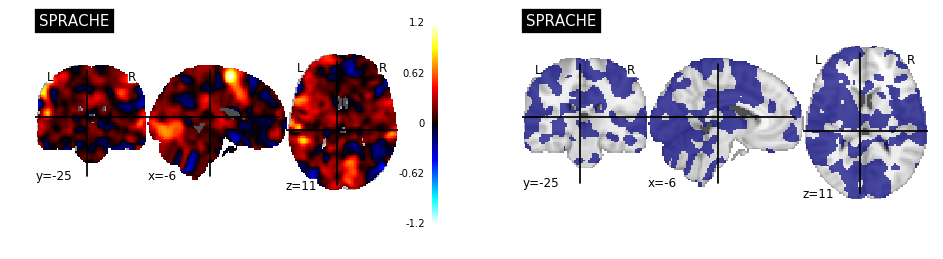

In [34]:
roiDf = makeMasks(trainMeanDf,50)
plotRois(roiDf,trainMeanDf)

### Das Gleiche für Percentil 99

/data/martin/seminarSS18/venv/lib/python2.7/site-packages/numpy/ma/core.py:2784: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


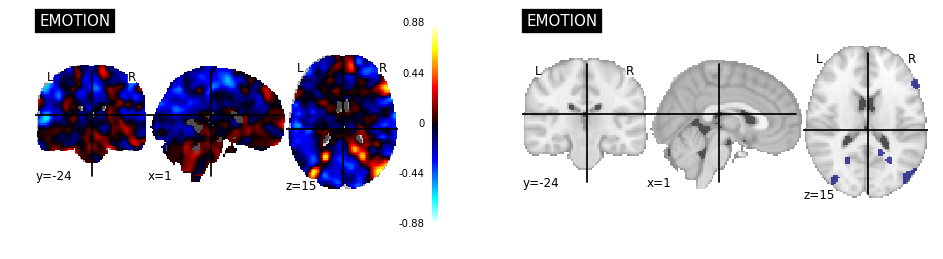

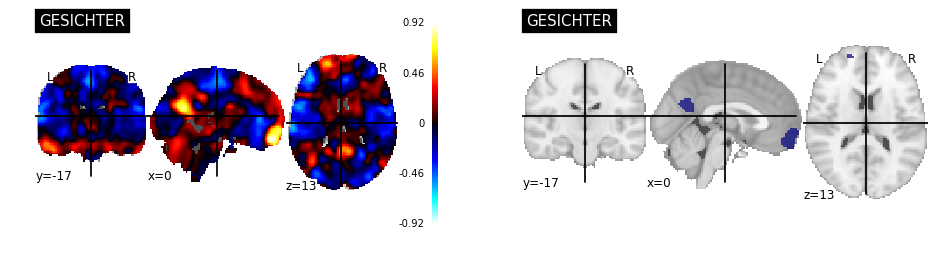

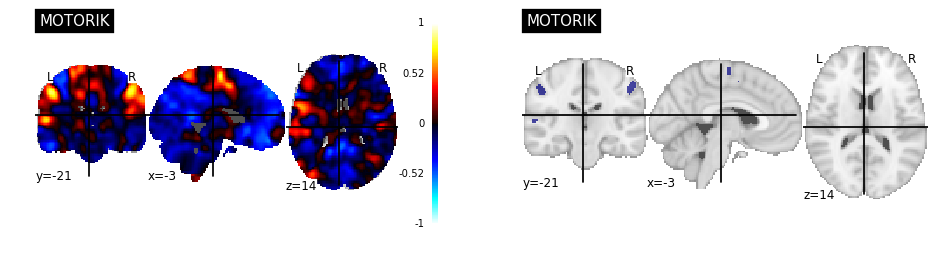

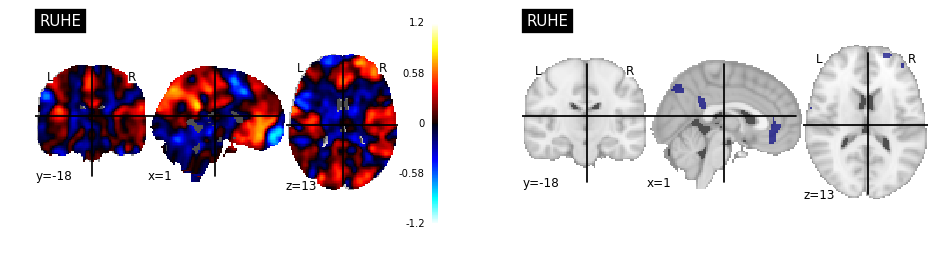

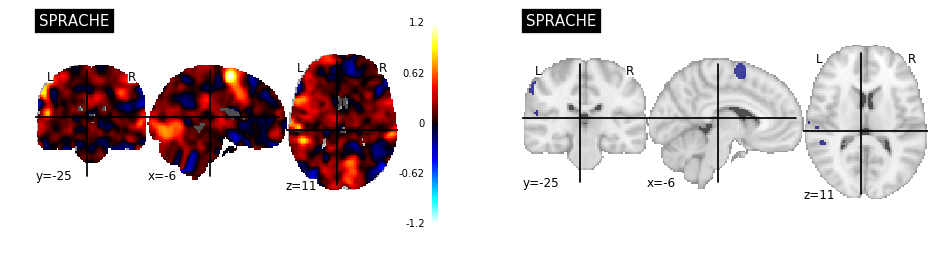

In [35]:
roiDf = makeMasks(trainMeanDf,99)
plotRois(roiDf,trainMeanDf)

### Wir machen daraus eine Maske  

Das heißt, wir nehmen die Voxel die in mindestens einer der 5 Masken vorkommen (also die inklusive Diskunktion im Sinne von „(A oder B) und (A und B)“

In [36]:
def mergeRois(roiDf):
    copyDf = roiDf.copy()
    #wir summieren die 5 Masken auf, jetzt können wir für jeden
    # Voxel Werte zwischen Null und Fünf haben (0: keine der Masken
    # enthält das Voxel, 5: alle Masken enthalten das Voxel)
    sumDf = pd.DataFrame( copyDf.sum(axis=0) )
    # uns interessieren alle Voxel mit Werten größer Null (also: mindestens
    # eine der Masken enthält das Voxel)
    sumDf[sumDf>0] = 1
    sumDf[sumDf<1] = 0
    return sumDf.T

In [37]:
thisBigRoi = mergeRois(roiDf)

In [38]:
thisBigRoiImg = masker.inverse_transform(thisBigRoi.values)

Schauen wir uns das Ergebnis an:  
- links sehen wir die Maske
- rechts sehen wird die einzelnen Masken farbkodiert

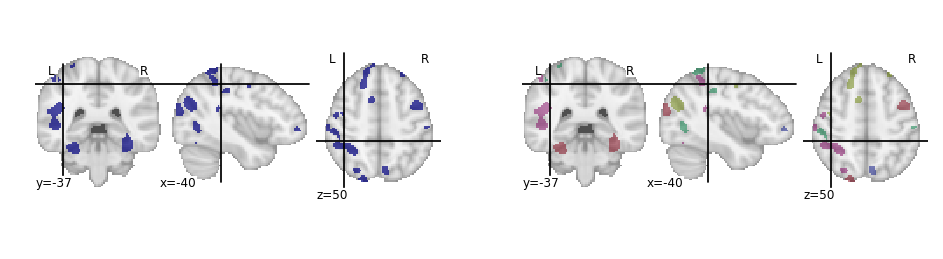

In [39]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
display = plotting.plot_roi(thisBigRoiImg,axes=ax1);
plotting.plot_prob_atlas( masker.inverse_transform(np.array(roiDf)),cut_coords=display.cut_coords,axes=ax2 )
plt.show()

### Maske anwenden

Wir verwenden jetzt die Maske zum maskieren, indem wir ein Objekt "roiMasker" erstellen, welches bei der Extraktion der Daten aus den Hirnbildern nur Voxel unserer Maske berücksichtigt.

In [40]:
roiMasker = input_data.NiftiMasker(mask_img=thisBigRoiImg,smoothing_fwhm=None).fit()

In [41]:
roiMasker

NiftiMasker(detrend=False, high_pass=None, low_pass=None, mask_args=None,
      mask_img=<nibabel.nifti1.Nifti1Image object at 0x7fb17d08ae10>,
      mask_strategy='background', memory=Memory(cachedir=None),
      memory_level=1, sample_mask=None, sessions=None, smoothing_fwhm=None,
      standardize=False, t_r=None, target_affine=None, target_shape=None,
      verbose=0)

Zum Vergleich: die alte "whole-brain" Maske links und unsere sehr spartanische "Klecks-Maske" rechts:  

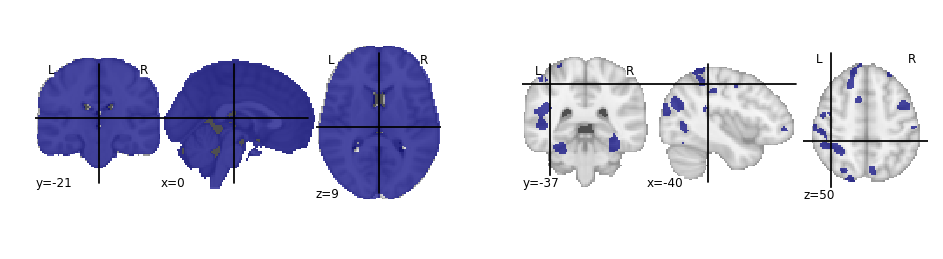

In [42]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
plotting.plot_roi(masker.mask_img_,axes=ax1)
plotting.plot_roi(roiMasker.mask_img_,axes=ax2)
plt.show()

### Daten extrahieren

In [43]:
blockDf = makeBigDf(imgList,roiMasker)

In [44]:
blockDf

0         1         2      \
EMOTION   004_Negativ-Sturm                0.364361  0.032592  0.365986   
          007_Positiv-Wald                 0.179974  0.148004  0.035055   
          013_Negativ-Klippe               0.454852  0.381284  0.461645   
          016_Positiv-Strand               0.104385 -0.140310  0.031730   
          024_Negativ-Waldbrand            0.020446 -0.093654 -0.109227   
          029_Positiv-See                 -1.419483 -1.315085 -1.344720   
          033_Negativ-Strand              -0.173596 -0.037018 -0.111112   
          036_Positiv-Berg                -0.663890 -0.790687 -0.733274   
GESICHTER 003_Bekannt-Freunde             -0.273543 -0.118109 -0.268389   
          008_Beruehmt-Filmschauspieler   -0.157148 -0.248645 -0.237019   
          011_Bekannt-Familie             -0.569328 -0.522960 -0.620561   
          017_Beruehmt-Musiker            -1.056787 -1.135109 -1.215865   
          022_Bekannt-Kommilitonen        -0.207612 -0.253142 -0.194354   
          026_Beruehmt-Serienschauspieler  0.426936  0.454378  0.332193   
          032_Bekannt-Schulfreunde        -0.671948 -0.678711 -0.629508   
          038_Beruehmt-Sportler           -0.071861 -0.037630 -0.132731   
MOTORIK   002_Haende-Jonglieren            0.408046  0.432008  0.377416   
          006_Fuesse-Balltreten            1.109397  1.181920  1.091787   
          012_Haende-Kanu                  0.380424  0.436905  0.551897   
          018_Fuesse-Fahrrad               0.705352  0.663473  0.750147   
          021_Haende-Boxen                 0.803802  0.891161  0.786339   
          028_Fuesse-Hochseil              0.781467  0.791212  0.845668   
          034_Haende-Ballwerfen            0.515925  0.505097  0.470970   
          039_Fuesse-Trampolin             0.895516  0.760556  0.787832   
RUHE      005_Ruhe                        -0.657108 -0.659051 -0.643416   
          010_Ruhe                        -0.028732  0.129821  0.033088   
          015_Ruhe                        -0.531710 -0.402706 -0.358973   
          020_Ruhe                         0.357695  0.414688  0.315163   
          025_Ruhe                        -0.542697 -0.571860 -0.415033   
          030_Ruhe                         0.694204  0.696650  0.808550   
...                                             ...       ...       ...   
test      s08num010                        0.066440 -0.084875 -0.002651   
          s08num011                        0.453201  0.518623  0.543542   
          s08num012                       -0.534766 -0.474554 -0.410289   
          s08num013                        0.877294  0.979699  0.957321   
          s08num014                       -0.177383 -0.396032 -0.191883   
          s08num015                       -0.589293 -0.469439 -0.393669   
          s08num016                        0.026888 -0.011127 -0.003536   
          s08num017                       -0.023662  0.094537 -0.020739   
          s08num018                        0.626201  0.716803  0.546715   
          s08num019                        0.748678  0.748193  0.764053   
          s08num020                       -0.231850 -0.236602 -0.225743   
          s08num021                        0.923372  0.718160  0.716271   
          s08num022                       -0.569714 -0.590797 -0.647188   
          s08num023                        0.801399  0.879627  0.857693   
          s08num024                        0.205921  0.144060  0.124889   
          s08num025                       -0.595928 -0.486781 -0.540846   
          s08num026                       -0.565715 -0.517772 -0.547551   
          s08num027                       -0.773864 -0.741544 -0.811164   
          s08num028                        0.439598  0.427981  0.444223   
          s08num029                        0.099673  0.097896  0.078921   
          s08num030                       -0.385472 -0.279588 -0.420278   
          s08num031                       -0.003371  0.083519  0.141656

### Aufteilen der Daten in Training und Test

In [45]:
train,test = makeTrainTest(blockDf)
trainMeanDf = train.groupby(level=0).mean()

### Sanity Check: Korrelation der Trainingsdaten mit sich selbst

In [46]:
myCorrDf = pd.DataFrame(np.corrcoef(trainMeanDf,train)[5:,:5],
                        index=train.index,
                        columns=trainMeanDf.index)

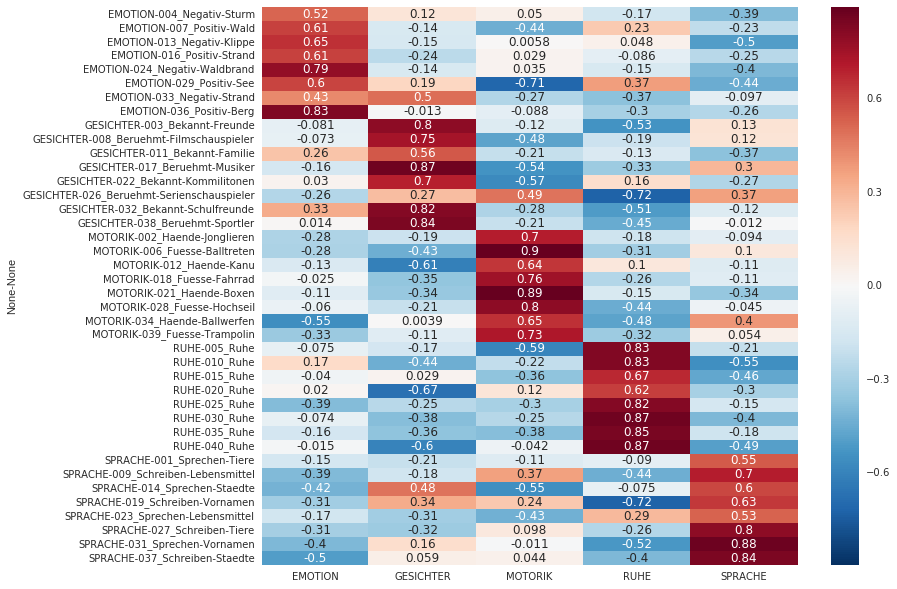

In [47]:
plt.figure(figsize=(12,10))
sns.heatmap(myCorrDf,annot=True)
plt.show()

### Vorhersage der Testdaten

In [48]:
myCorrDf = pd.DataFrame(np.corrcoef(trainMeanDf,test)[5:,:5],
                        index=test.index,
                        columns=trainMeanDf.index)

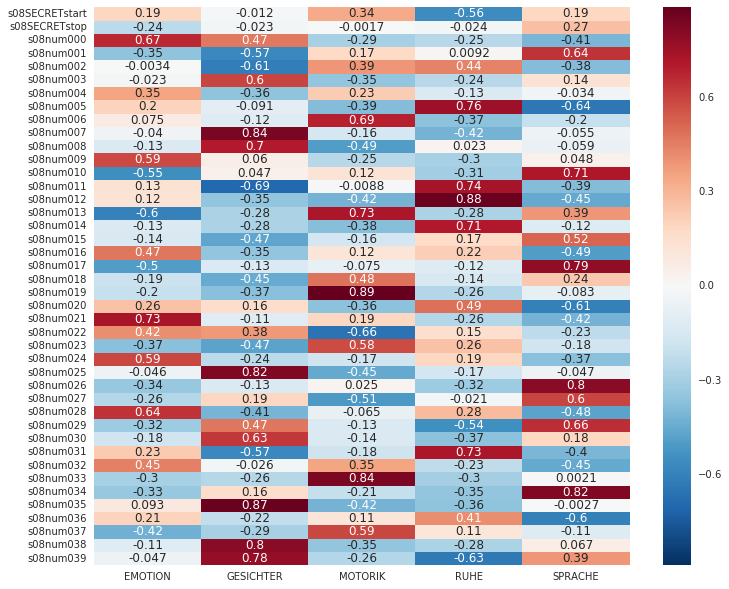

In [49]:
plt.figure(figsize=(12,10))
sns.heatmap(myCorrDf,annot=True)
plt.show()

In [50]:
corrPredDf = makeCorrPred(myCorrDf)

In [51]:
corrPredDf

,winner
s08SECRETstart,MOTORIK
s08SECRETstop,SPRACHE
s08num000,EMOTION
s08num001,SPRACHE
s08num002,RUHE
s08num003,GESICHTER
s08num004,EMOTION
s08num005,RUHE
s08num006,MOTORIK
s08num007,GESICHTER


### Blockweise Korrelation

Wir können auch jeden Block mit jedem anderen Korrelieren, um so nicht nur nach der ähnlichsten Bedinugung, sondern auch nach dem ähnlichsten Block - und damit nach dem ähnlichsten Inhalt - zu suchen:

In [52]:
def makeBlockPred(test,train):
    testDf = test.copy();trainDf = train.copy()
    testDf.index = [['geheim']*testDf.shape[0],testDf.index]
    bigDf = pd.concat([trainDf,testDf],axis=0)
    bigCorrDf = bigDf.T.corr()
    blockPredDf = bigCorrDf.drop('geheim',level=0)['geheim'].T
    return blockPredDf

In [53]:
blockPredDf = makeBlockPred(test,train)

In [54]:
blockPredDf

EMOTION                                      \
               004_Negativ-Sturm 007_Positiv-Wald 013_Negativ-Klippe   
s08SECRETstart          0.359209        -0.115269           0.220879   
s08SECRETstop          -0.359168         0.023120          -0.238182   
s08num000               0.504930         0.218030           0.384009   
s08num001              -0.504194         0.050042          -0.282800   
s08num002              -0.119201         0.181478           0.056788   
s08num003              -0.036835        -0.162397          -0.029812   
s08num004               0.427370         0.233883           0.322142   
s08num005               0.017080         0.240567           0.193628   
s08num006               0.587020        -0.294503           0.316168   
s08num007               0.290791        -0.192630          -0.115776   
s08num008              -0.169521        -0.054577          -0.287978   
s08num009               0.070168         0.462901           0.244556   
s08num010              -0.090869        -0.373731          -0.387602   
s08num011              -0.059228         0.321681           0.233860   
s08num012              -0.201606         0.377825           0.126989   
s08num013              -0.147770        -0.425222          -0.376918   
s08num014              -0.197143         0.173228           0.070374   
s08num015              -0.335110         0.210788          -0.239130   
s08num016               0.221165         0.198200           0.563396   
s08num017              -0.496364        -0.105551          -0.489646   
s08num018              -0.406079         0.020614          -0.203849   
s08num019               0.031904        -0.372787           0.055526   
s08num020               0.367084         0.165484           0.226275   
s08num021               0.556084         0.227468           0.648816   
s08num022               0.246653         0.270687           0.191123   
s08num023              -0.219657        -0.324570          -0.130871   
s08num024              -0.077883         0.463600           0.387231   
s08num025              -0.084646        -0.098027          -0.243481   
s08num026              -0.312751        -0.003550          -0.365222   
s08num027              -0.629150         0.120902          -0.585797   
s08num028               0.095038         0.452264           0.397972   
s08num029              -0.302817        -0.209117          -0.537450   
s08num030               0.169609        -0.214175          -0.216231   
s08num031              -0.086550         0.292476           0.284640   
s08num032               0.642319        -0.065216           0.690588   
s08num033               0.089326        -0.518563           0.054555   
s08num034              -0.085685        -0.104734          -0.378848   
s08num035               0.150335        -0.012961          -0.157617   
s08num036               0.298429        -0.038593           0.456592   
s08num037              -0.058498        -0.438523          -0.080562   
s08num038               0.214670        -0.249640          -0.108074   
s08num039               0.082123        -0.120789          -0.203329   

                                                                         \
               016_Positiv-Strand 024_Negativ-Waldbrand 029_Positiv-See   
s08SECRETstart           0.027494              0.424233       -0.324269   
s08SECRETstop            0.008215             -0.345856       -0.110976   
s08num000                0.203603              0.508934        0.483764   
s08num001                0.126710             -0.268720       -0.376667   
s08num002                0.389952             -0.002379       -0.098309   
s08num003               -0.202686             -0.228625        0.254416   
s08num004                0.185079              0.574844       -0.207789   
s08num005                0.047586              0.084601        0.566857   
s08num006               -0.114577              0.321121       -0.444238   
s08num007               -0.3853

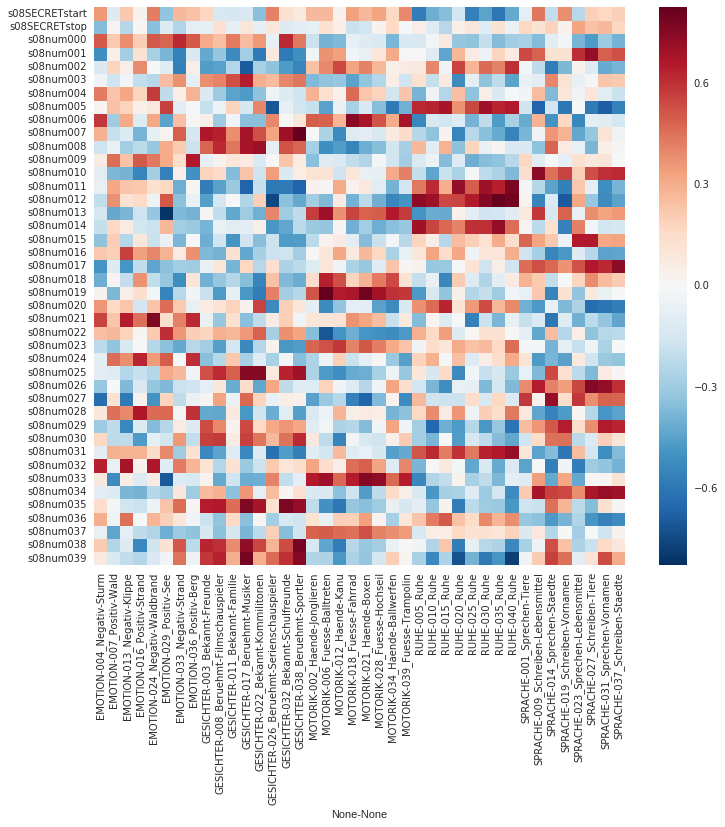

In [55]:
fig = plt.figure(figsize=(12,10))
sns.heatmap(blockPredDf,square=True)
plt.show()

Die höhste individuelle Korrelation finden:

In [56]:
pd.DataFrame(blockPredDf.T.idxmax())

,0
s08SECRETstart,"(SPRACHE, 009_Schreiben-Lebensmittel)"
s08SECRETstop,"(SPRACHE, 023_Sprechen-Lebensmittel)"
s08num000,"(GESICHTER, 032_Bekannt-Schulfreunde)"
s08num001,"(SPRACHE, 027_Schreiben-Tiere)"
s08num002,"(RUHE, 040_Ruhe)"
s08num003,"(GESICHTER, 017_Beruehmt-Musiker)"
s08num004,"(EMOTION, 024_Negativ-Waldbrand)"
s08num005,"(RUHE, 030_Ruhe)"
s08num006,"(MOTORIK, 018_Fuesse-Fahrrad)"
s08num007,"(GESICHTER, 038_Beruehmt-Sportler)"


### Die Korrelationen absteigend sortieren

In [57]:
def makeSortDf(blockPredDf):
    mySortDf = pd.DataFrame()
    # für alle zeilen 
    for i in blockPredDf.index:
        # wir sortieren die korrelationen absteigend (höhste zuerst)
        thisSortDf = pd.DataFrame( blockPredDf.ix[i] ).sort_values(by=i,ascending=False)
        # wir geben dem ganzen interpretierbare namen
        thisSortDf = thisSortDf.reindex()
        idx = [ thisSortDf.index.levels[1][x] for x in thisSortDf.index.labels[1] ]
        thisDf = pd.DataFrame( zip( idx, thisSortDf.values.T[-1] ) ).T
        thisDf.index = [[i]*thisDf.shape[0], ['name','corr'] ]
        # wir fügen jede sortierte zeile einer großen tabelle hinzu
        mySortDf = pd.concat([mySortDf,thisDf])
    return mySortDf

In [58]:
bigSortDf = makeSortDf(blockPredDf)

In [59]:
bigSortDf

0   \
s08SECRETstart name  009_Schreiben-Lebensmittel   
               corr                    0.441547   
s08SECRETstop  name   023_Sprechen-Lebensmittel   
               corr                    0.333423   
s08num000      name    032_Bekannt-Schulfreunde   
               corr                    0.621775   
s08num001      name         027_Schreiben-Tiere   
               corr                    0.726326   
s08num002      name                    040_Ruhe   
               corr                    0.602131   
s08num003      name        017_Beruehmt-Musiker   
               corr                    0.650424   
s08num004      name       024_Negativ-Waldbrand   
               corr                    0.574844   
s08num005      name                    030_Ruhe   
               corr                    0.697432   
s08num006      name          018_Fuesse-Fahrrad   
               corr                     0.75406   
s08num007      name       038_Beruehmt-Sportler   
               corr                    0.821533   
s08num008      name    022_Bekannt-Kommilitonen   
               corr                    0.707567   
s08num009      name            036_Positiv-Berg   
               corr                     0.66179   
s08num010      name  009_Schreiben-Lebensmittel   
               corr                    0.739657   
s08num011      name                    040_Ruhe   
               corr                    0.778623   
s08num012      name                    035_Ruhe   
               corr                     0.82164   
...                                         ...   
s08num025      name    022_Bekannt-Kommilitonen   
               corr                    0.749825   
s08num026      name         027_Schreiben-Tiere   
               corr                    0.761583   
s08num027      name        014_Sprechen-Staedte   
               corr                    0.717645   
s08num028      name          016_Positiv-Strand   
               corr                    0.669234   
s08num029      name       031_Sprechen-Vornamen   
               corr                    0.657978   
s08num030      name       038_Beruehmt-Sportler   
               corr                    0.617226   
s08num031      name                    040_Ruhe   
               corr                    0.719959   
s08num032      name          013_Negativ-Klippe   
               corr                    0.690588   
s08num033      name            021_Haende-Boxen   
               corr                    0.756154   
s08num034      name       031_Sprechen-Vornamen   
               corr                    0.720803   
s08num035      name    032_Bekannt-Schulfreunde   
               corr                     0.77964   
s08num036      name                    015_Ruhe   
               corr                    0.507661   
s08num037      name            021_Haende-Boxen   
               corr                    0.535223   
s08num038      name       038_Beruehmt-Sportler   
               corr                    0.791109   
s08num039      name        017_Beruehmt-Musiker   
               corr                    0.788177   

                                                1   \
s08SECRETstart name          024_Negativ-Waldbrand   
               corr                       0.424233   
s08SECRETstop  name          031_Sprechen-Vornamen   
               corr                       0.268943   
s08num000      name             033_Negativ-Strand   
               corr                       0.620951   
s08num001      name      023_Sprechen-Lebensmittel   
               corr                       0.612384   
s08num002      name                       020_Ruhe   
               corr                        0.55848   
s08num003      name            011_Bekannt-Familie   
               corr                       0.532677   
s08num004      name             018_Fuesse-Fahrrad   
               corr                       0.467102   
s08num005      name                       015_Ruhe   
               cor

## Feintuning

In [60]:
def makeMasker(voxelPc,imgList,masker=masker):
    
    # get the data
    blockDf = makeBigDf(imgList,masker)
    # get the half used for mask creation
    thisHalfDf,otherHalfDf = makeTrainTest(blockDf)
    thisHalfMeanDf = thisHalfDf.groupby(level=0).mean()
    # make the 5 masks
    roiDf = makeMasks(thisHalfMeanDf,voxelPc)
    # merge the 5 masks
    thisBigRoi = mergeRois(roiDf)
    # make mask image
    thisBigRoiImg = masker.inverse_transform(thisBigRoi.values)
    # make masker object from mask + the setting of a smoothing kernel
    roiMasker = input_data.NiftiMasker(mask_img=thisBigRoiImg,
                                       standardize=False,
                                       smoothing_fwhm=None).fit()
    
    return roiMasker

In [61]:
'../test/'

'../test/'

In [62]:
def makeEverything(voxelPc,smoo,masker=masker):
    
    imgList = ['../training/%s'%x for x in os.listdir('../training/')] + \
    ['../test/%s'%x for x in os.listdir('../test/')]

    thisSmoo = ('0%s'%smoo)[-2:]
    imgList = [x for x in imgList if x.split('/')[-1].startswith('s%s'%thisSmoo) ]

    imgList.sort()

    # define feature space through first half
    thisRoiMasker = makeMasker(voxelPc,imgList)
    
    # exctract data using features selected based on first half
    thisBlockMaskDf = makeBigDf(imgList,thisRoiMasker)
    trainingMaskDf,testMaskDf = makeTrainTest(thisBlockMaskDf)

    trainingMeanMaskDf = trainingMaskDf.groupby(level=0).mean()

    myCorrDf = pd.DataFrame(np.corrcoef(trainingMeanMaskDf,testMaskDf)[5:,:5],
                            index=testMaskDf.index,
                            columns=trainingMeanMaskDf.index)
    
    myCorrDf.sort_index(inplace=True)

    corrPredDf = makeCorrPred(myCorrDf)
    blockPredDf = makeBlockPred(testMaskDf,trainingMaskDf)

    bigSortDf = makeSortDf(blockPredDf)
    
    return myCorrDf,corrPredDf,blockPredDf,bigSortDf

### Ihre Aufgabe: Parameter anpassen

In [63]:
########### hier Werte eingeben ############
pc = 99     # percentil (zwischen 0 und 100)
smoo = 8    # glättung (ab 0)
############################################

myCorrDf,corrPredDf,blockPredDf,bigSortDf = makeEverything(pc,smoo)
corrBlockDf = pd.DataFrame(blockPredDf.T.idxmax())

In [64]:
myCorrDf

,EMOTION,GESICHTER,MOTORIK,RUHE,SPRACHE
s08SECRETstart,0.192119,-0.012070,0.337488,-0.556841,0.185687
s08SECRETstop,-0.240195,-0.022641,-0.001736,-0.024472,0.266369
s08num000,0.666564,0.468659,-0.293314,-0.246341,-0.406956
s08num001,-0.353958,-0.568886,0.173845,0.009190,0.642915
s08num002,-0.003439,-0.611179,0.390084,0.438175,-0.383334
s08num003,-0.023433,0.598462,-0.352710,-0.244067,0.135871
s08num004,0.352236,-0.358002,0.228113,-0.132969,-0.034319
s08num005,0.204023,-0.090658,-0.387863,0.759747,-0.641268
s08num006,0.074509,-0.116647,0.689434,-0.365521,-0.203084
s08num007,-0.039854,0.844001,-0.156997,-0.417100,-0.054994


In [65]:
corrPredDf

,winner
s08SECRETstart,MOTORIK
s08SECRETstop,SPRACHE
s08num000,EMOTION
s08num001,SPRACHE
s08num002,RUHE
s08num003,GESICHTER
s08num004,EMOTION
s08num005,RUHE
s08num006,MOTORIK
s08num007,GESICHTER


In [66]:
corrBlockDf

,0
s08SECRETstart,"(SPRACHE, 009_Schreiben-Lebensmittel)"
s08SECRETstop,"(SPRACHE, 023_Sprechen-Lebensmittel)"
s08num000,"(GESICHTER, 032_Bekannt-Schulfreunde)"
s08num001,"(SPRACHE, 027_Schreiben-Tiere)"
s08num002,"(RUHE, 040_Ruhe)"
s08num003,"(GESICHTER, 017_Beruehmt-Musiker)"
s08num004,"(EMOTION, 024_Negativ-Waldbrand)"
s08num005,"(RUHE, 030_Ruhe)"
s08num006,"(MOTORIK, 018_Fuesse-Fahrrad)"
s08num007,"(GESICHTER, 038_Beruehmt-Sportler)"


In [67]:
blockPredDf

EMOTION                                      \
               004_Negativ-Sturm 007_Positiv-Wald 013_Negativ-Klippe   
s08SECRETstart          0.359209        -0.115269           0.220879   
s08SECRETstop          -0.359168         0.023120          -0.238182   
s08num000               0.504930         0.218030           0.384009   
s08num001              -0.504194         0.050042          -0.282800   
s08num002              -0.119201         0.181478           0.056788   
s08num003              -0.036835        -0.162397          -0.029812   
s08num004               0.427370         0.233883           0.322142   
s08num005               0.017080         0.240567           0.193628   
s08num006               0.587020        -0.294503           0.316168   
s08num007               0.290791        -0.192630          -0.115776   
s08num008              -0.169521        -0.054577          -0.287978   
s08num009               0.070168         0.462901           0.244556   
s08num010              -0.090869        -0.373731          -0.387602   
s08num011              -0.059228         0.321681           0.233860   
s08num012              -0.201606         0.377825           0.126989   
s08num013              -0.147770        -0.425222          -0.376918   
s08num014              -0.197143         0.173228           0.070374   
s08num015              -0.335110         0.210788          -0.239130   
s08num016               0.221165         0.198200           0.563396   
s08num017              -0.496364        -0.105551          -0.489646   
s08num018              -0.406079         0.020614          -0.203849   
s08num019               0.031904        -0.372787           0.055526   
s08num020               0.367084         0.165484           0.226275   
s08num021               0.556084         0.227468           0.648816   
s08num022               0.246653         0.270687           0.191123   
s08num023              -0.219657        -0.324570          -0.130871   
s08num024              -0.077883         0.463600           0.387231   
s08num025              -0.084646        -0.098027          -0.243481   
s08num026              -0.312751        -0.003550          -0.365222   
s08num027              -0.629150         0.120902          -0.585797   
s08num028               0.095038         0.452264           0.397972   
s08num029              -0.302817        -0.209117          -0.537450   
s08num030               0.169609        -0.214175          -0.216231   
s08num031              -0.086550         0.292476           0.284640   
s08num032               0.642319        -0.065216           0.690588   
s08num033               0.089326        -0.518563           0.054555   
s08num034              -0.085685        -0.104734          -0.378848   
s08num035               0.150335        -0.012961          -0.157617   
s08num036               0.298429        -0.038593           0.456592   
s08num037              -0.058498        -0.438523          -0.080562   
s08num038               0.214670        -0.249640          -0.108074   
s08num039               0.082123        -0.120789          -0.203329   

                                                                         \
               016_Positiv-Strand 024_Negativ-Waldbrand 029_Positiv-See   
s08SECRETstart           0.027494              0.424233       -0.324269   
s08SECRETstop            0.008215             -0.345856       -0.110976   
s08num000                0.203603              0.508934        0.483764   
s08num001                0.126710             -0.268720       -0.376667   
s08num002                0.389952             -0.002379       -0.098309   
s08num003               -0.202686             -0.228625        0.254416   
s08num004                0.185079              0.574844       -0.207789   
s08num005                0.047586              0.084601        0.566857   
s08num006               -0.114577              0.321121       -0.444238   
s08num007               -0.3853

In [68]:
bigSortDf

0   \
s08SECRETstart name  009_Schreiben-Lebensmittel   
               corr                    0.441547   
s08SECRETstop  name   023_Sprechen-Lebensmittel   
               corr                    0.333423   
s08num000      name    032_Bekannt-Schulfreunde   
               corr                    0.621775   
s08num001      name         027_Schreiben-Tiere   
               corr                    0.726326   
s08num002      name                    040_Ruhe   
               corr                    0.602131   
s08num003      name        017_Beruehmt-Musiker   
               corr                    0.650424   
s08num004      name       024_Negativ-Waldbrand   
               corr                    0.574844   
s08num005      name                    030_Ruhe   
               corr                    0.697432   
s08num006      name          018_Fuesse-Fahrrad   
               corr                     0.75406   
s08num007      name       038_Beruehmt-Sportler   
               corr                    0.821533   
s08num008      name    022_Bekannt-Kommilitonen   
               corr                    0.707567   
s08num009      name            036_Positiv-Berg   
               corr                     0.66179   
s08num010      name  009_Schreiben-Lebensmittel   
               corr                    0.739657   
s08num011      name                    040_Ruhe   
               corr                    0.778623   
s08num012      name                    035_Ruhe   
               corr                     0.82164   
...                                         ...   
s08num025      name    022_Bekannt-Kommilitonen   
               corr                    0.749825   
s08num026      name         027_Schreiben-Tiere   
               corr                    0.761583   
s08num027      name        014_Sprechen-Staedte   
               corr                    0.717645   
s08num028      name          016_Positiv-Strand   
               corr                    0.669234   
s08num029      name       031_Sprechen-Vornamen   
               corr                    0.657978   
s08num030      name       038_Beruehmt-Sportler   
               corr                    0.617226   
s08num031      name                    040_Ruhe   
               corr                    0.719959   
s08num032      name          013_Negativ-Klippe   
               corr                    0.690588   
s08num033      name            021_Haende-Boxen   
               corr                    0.756154   
s08num034      name       031_Sprechen-Vornamen   
               corr                    0.720803   
s08num035      name    032_Bekannt-Schulfreunde   
               corr                     0.77964   
s08num036      name                    015_Ruhe   
               corr                    0.507661   
s08num037      name            021_Haende-Boxen   
               corr                    0.535223   
s08num038      name       038_Beruehmt-Sportler   
               corr                    0.791109   
s08num039      name        017_Beruehmt-Musiker   
               corr                    0.788177   

                                                1   \
s08SECRETstart name          024_Negativ-Waldbrand   
               corr                       0.424233   
s08SECRETstop  name          031_Sprechen-Vornamen   
               corr                       0.268943   
s08num000      name             033_Negativ-Strand   
               corr                       0.620951   
s08num001      name      023_Sprechen-Lebensmittel   
               corr                       0.612384   
s08num002      name                       020_Ruhe   
               corr                        0.55848   
s08num003      name            011_Bekannt-Familie   
               corr                       0.532677   
s08num004      name             018_Fuesse-Fahrrad   
               corr                       0.467102   
s08num005      name                       015_Ruhe   
               cor